In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = "..\\medical_insurance.csv"

df = pd.read_csv(file_path)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


In [2]:
import sklearn.model_selection
from sklearn import preprocessing

# normalize features and label
df[["age_norm", "bmi_norm", "children_norm"]] = preprocessing.MinMaxScaler().fit_transform(df[["age", "bmi", "children"]])
df[["sex_norm", "smoker_norm"]] = preprocessing.OrdinalEncoder().fit_transform(df[["sex", "smoker"]])

feature_cols = ["age_norm", "bmi_norm", "children_norm", "sex_norm"]
x = df[feature_cols].to_numpy()
y = df["smoker_norm"].to_numpy()

# train-test split
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.3, random_state=42)
x_train, y_train

(array([[0.2826087 , 0.49582997, 0.6       , 1.        ],
        [0.80434783, 0.47282755, 0.4       , 0.        ],
        [0.19565217, 0.24791499, 0.        , 0.        ],
        ...,
        [0.45652174, 0.21280603, 1.        , 0.        ],
        [0.86956522, 0.24791499, 0.        , 1.        ],
        [0.41304348, 0.85122411, 0.4       , 0.        ]]),
 array([1., 0., 0., ..., 0., 0., 1.]))

[Text(0.4965827485507132, 0.9838709677419355, 'x[3] <= 0.5\ngini = 0.324\nsamples = 2772\nvalue = [2208, 564]'),
 Text(0.23645489440346248, 0.9516129032258065, 'x[1] <= 0.189\ngini = 0.282\nsamples = 1366\nvalue = [1134, 232]'),
 Text(0.05711848610738149, 0.9193548387096774, 'x[2] <= 0.3\ngini = 0.407\nsamples = 148\nvalue = [106, 42]'),
 Text(0.027295559732730977, 0.8870967741935484, 'x[1] <= 0.152\ngini = 0.338\nsamples = 102\nvalue = [80, 22]'),
 Text(0.012131359881213768, 0.8548387096774194, 'x[1] <= 0.113\ngini = 0.147\nsamples = 50\nvalue = [46, 4]'),
 Text(0.008087573254142512, 0.8225806451612904, 'gini = 0.0\nsamples = 26\nvalue = [26, 0]'),
 Text(0.016175146508285023, 0.8225806451612904, 'x[1] <= 0.124\ngini = 0.278\nsamples = 24\nvalue = [20, 4]'),
 Text(0.012131359881213768, 0.7903225806451613, 'x[2] <= 0.1\ngini = 0.5\nsamples = 8\nvalue = [4, 4]'),
 Text(0.008087573254142512, 0.7580645161290323, 'x[1] <= 0.119\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.004043786

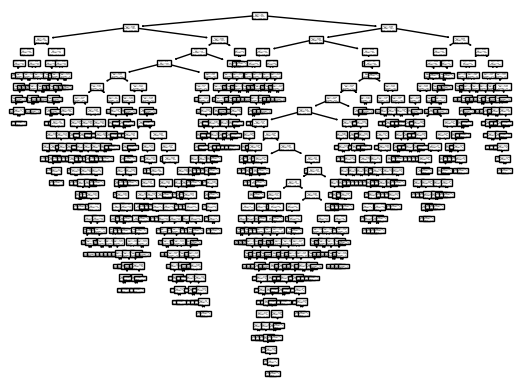

In [3]:
from sklearn import tree

classifier = tree.DecisionTreeClassifier()
classifier = classifier.fit(x, y)

tree.plot_tree(classifier)